In [1]:
# Importing libraries
import math
import random
import matplotlib.pyplot as plt

In [2]:
# To calculate the Entropy
def calculateEntropy(data):
  if len(data)==0: # edge case
    return 0
  nP = 0
  nQ = 0
  for each in data:
    if each[1]=='P':
      nP += 1;
    else:
      nQ += 1;
  p = nP/len(data)
  q = nQ/len(data)
  p = (-p * math.log2(p)) if p else 0
  q = (q * math.log2(q)) if q else 0
  H =  p - q 
  return H # returning Entropy

In [3]:
# To calculate the information gains and find optimum threshold
def calculateInfoGain(data):
  values = list(set([each[0] for each in data])) # getting the attribute values
  values.sort() # sorting the values
  # generating all possible thresholds 
  thresholds = [(values[i]+values[i+1])/2 for i in range(0, len(values)-1)]
  # to store threshold value and related information gain
  info_gains = {}
  # calculating info. gain for all the possible thresholds
  for i in thresholds:
    S1 = []
    S2 = []
    for each in data:
      if each[0]<=i:
        S1.append(each)
      else:
        S2.append(each)
    h_s1_s2 = (len(S1)*calculateEntropy(S1) + len(S2)*calculateEntropy(S2))/len(data)
    info_gain = calculateEntropy(data) - h_s1_s2
    info_gains[i] = info_gain
  # optimum threshold having maximum info. gain
  opt_threshold = max(info_gains, key=info_gains.get)
  print("Optimum Threshold: ", opt_threshold)
  print("Maximum Information Gain: {} bits".format(info_gains[opt_threshold]))
  # plotting threshold vs info. gain plot
  plt.xlabel("Threshold \u03C4")
  plt.ylabel("Info. Gain G(\u03C4), bits")
  plt.plot(list(info_gains.keys()), list(info_gains.values()))
  plt.show()

In [4]:
# Given data
S = [
     [0, 'P'],
     [4, 'P'],
     [12, 'P'],
     [16, 'Q'],
     [16, 'Q'],
     [18, 'P'],
     [24, 'Q'],
     [26, 'Q'],
     [28, 'Q'],
     ]

Given S = 
[[0, 'P'], [4, 'P'], [12, 'P'], [16, 'Q'], [16, 'Q'], [18, 'P'], [24, 'Q'], [26, 'Q'], [28, 'Q']]
Optimum Threshold:  14.0
Maximum Information Gain: 0.5577277787393196 bits


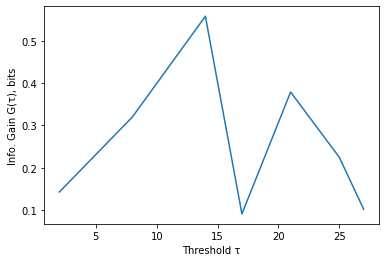

In [5]:
print("Given S = ")
print(S)
# Calling the main method to find out opt threshold
calculateInfoGain(S)

In [6]:
# Generating random dataset
choices = "PQ"
S = [[random.randint(0,100), random.choice(choices)] for i in range(0, random.randint(0,100))]

Now testing with another dataset S =
[[61, 'Q'], [20, 'P'], [77, 'P'], [32, 'Q'], [50, 'P'], [18, 'P'], [77, 'Q'], [11, 'P'], [1, 'P'], [57, 'P'], [88, 'Q'], [53, 'Q'], [67, 'Q'], [47, 'P'], [86, 'Q'], [13, 'P'], [64, 'Q'], [52, 'P'], [18, 'P'], [47, 'P'], [90, 'P'], [77, 'P'], [72, 'Q'], [74, 'Q'], [99, 'P'], [65, 'Q'], [10, 'Q'], [3, 'P'], [83, 'Q'], [94, 'Q'], [4, 'P'], [44, 'Q'], [76, 'P'], [96, 'Q'], [62, 'Q'], [1, 'P']]
Optimum Threshold:  52.5
Maximum Information Gain: 0.19873874579508788 bits


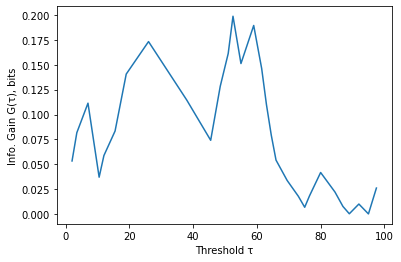

In [7]:
print("Now testing with another dataset S =")
# Testing with random dataset
# Or uncomment next line and give your own dataset S...
# S = 
print(S)
calculateInfoGain(S)